#loan sanction dataset where you will have to identify whether the loan of a particular person is approved or not depending on the information the individual has provided.

#Steps:-
1. Import all the necessary libraries
2. Import the dataset provided
3. Understand the data
4. Deal with the missing values if any
5. Do some visualization if necessary
6. Divide the dataset into training and test datasets
7. Build the machine learning model which ever is suitable for the dataset
8. Fit the model on the training dataset

9. Test the model and find the accuracy of the model on the test and the
training datasets
10. Create a confusion matrix

# Import  modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# load the dataset

In [ ]:
df=pd.read_csv('loan-predictionUC.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.values

array([['LP001002', 'Male', 'No', ..., 1.0, 'Urban', 'Y'],
       ['LP001003', 'Male', 'Yes', ..., 1.0, 'Rural', 'N'],
       ['LP001005', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ['LP002984', 'Male', 'Yes', ..., 1.0, 'Urban', 'Y'],
       ['LP002990', 'Female', 'No', ..., 0.0, 'Semiurban', 'N']],
      dtype=object)

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.axes

[RangeIndex(start=0, stop=614, step=1),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object')]

In [ ]:
df.ndim

2

In [ ]:
df.size

7982

In [ ]:
df.std()

<ipython-input-13-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

In [ ]:
df['ApplicantIncome'].min()

150

In [ ]:
df['ApplicantIncome'].max()

81000

# preprocessing dataset

In [ ]:
#find  the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Creation of new attributes

<Axes: >

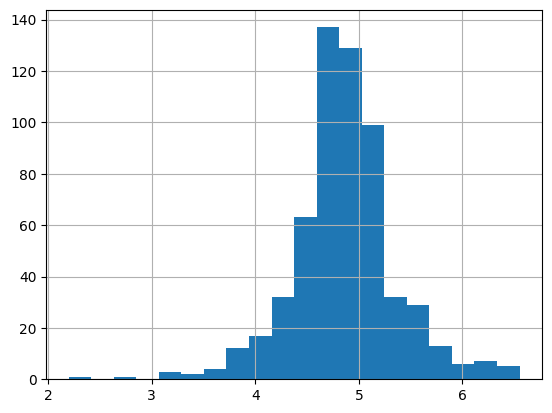

In [ ]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<Axes: >

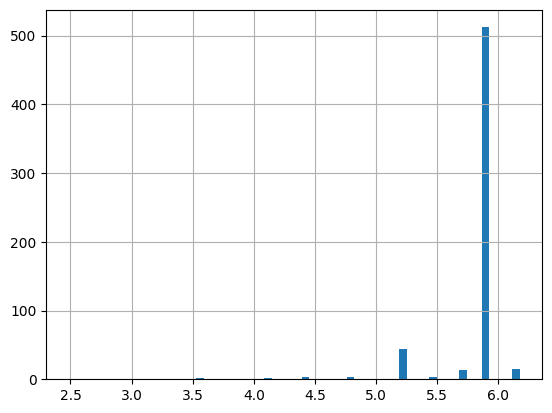

In [ ]:
df['Amount']=np.log(df['Loan_Amount_Term'])
df['Amount'].hist(bins=60)

<Axes: >

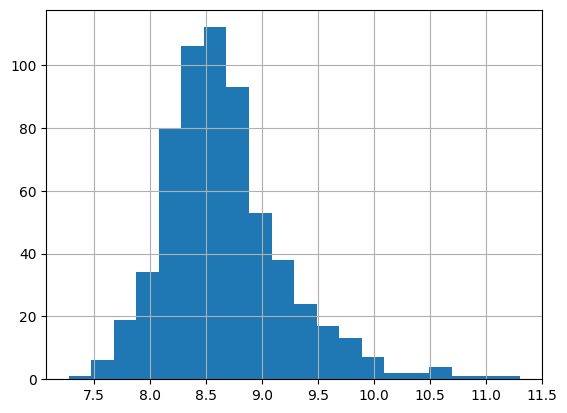

In [ ]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']

df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [ ]:
df.isnull().sum()# added  two  columns

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
Amount               14
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [ ]:
df.shape

(614, 17)

In [ ]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [ ]:

# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['LoanAmount_log'] = df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean())
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())


In [ ]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Amount               0
TotalIncome          0
TotalIncome_log      0
dtype: int64

# Exploratory Data Analysis

In [ ]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[: ,12].values

x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352,
        5.886104031450156],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617,
        5.886104031450156],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425,
        5.886104031450156],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752,
        5.886104031450156],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587,
        5.886104031450156],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754,
        5.886104031450156]], dtype=object)

In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

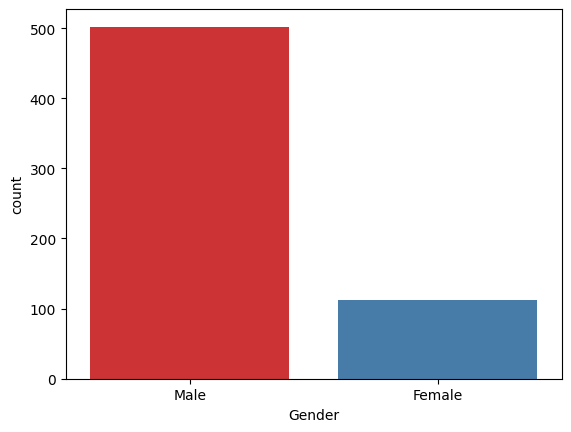

In [ ]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='Set1')

Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

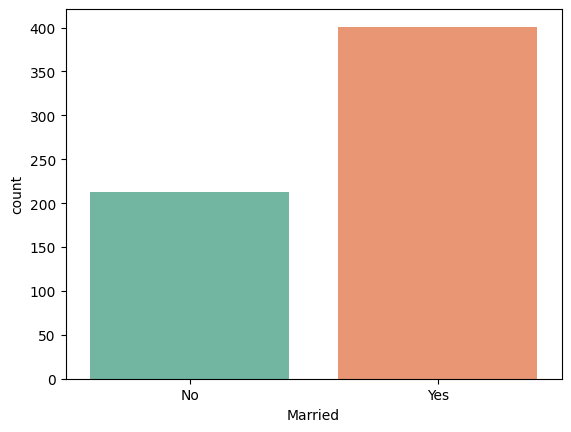

In [ ]:
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette='Set2')

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

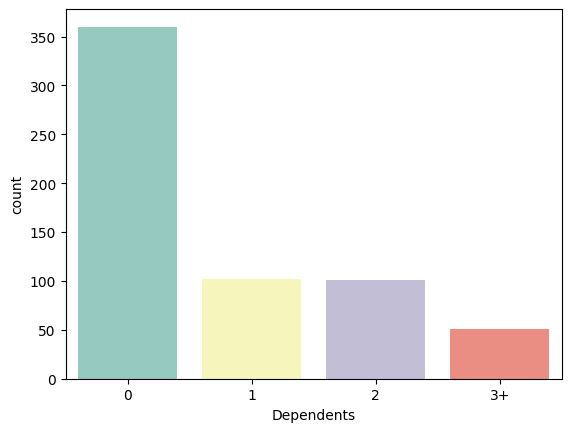

In [ ]:
print(df['Dependents'].value_counts())

sns.countplot(x='Dependents', data=df, palette='Set3')

No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

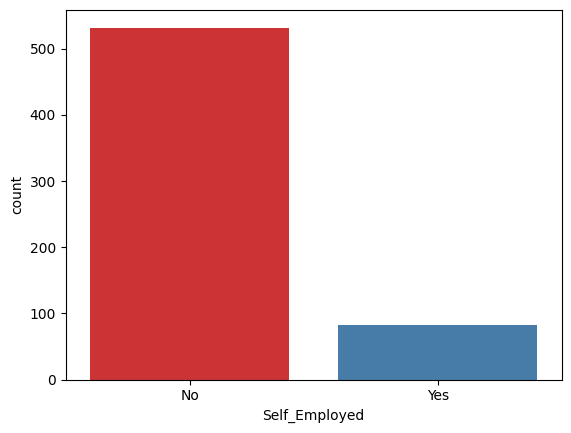

In [ ]:
print(df['Self_Employed'].value_counts())

sns.countplot(x='Self_Employed', data=df, palette='Set1')

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

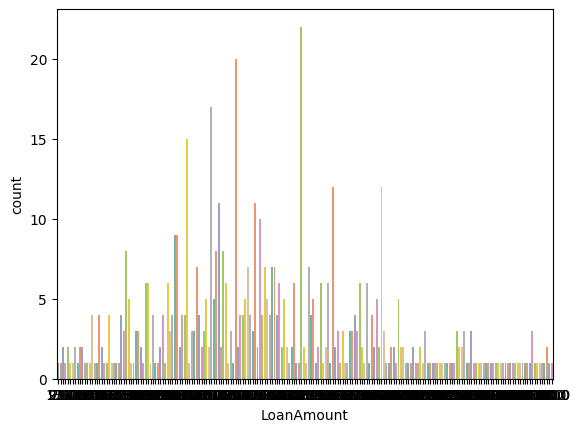

In [ ]:
print(df['LoanAmount'].value_counts())

sns.countplot(x='LoanAmount', data=df, palette='Set2')

<ipython-input-33-cb2a1af33b08>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ApplicantIncome"])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

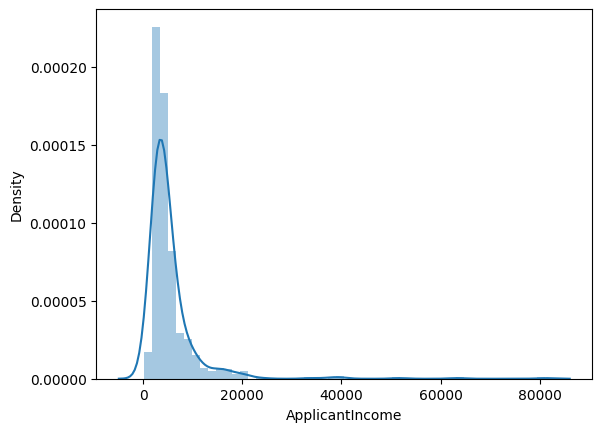

In [ ]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

<ipython-input-34-a57b2740f2e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

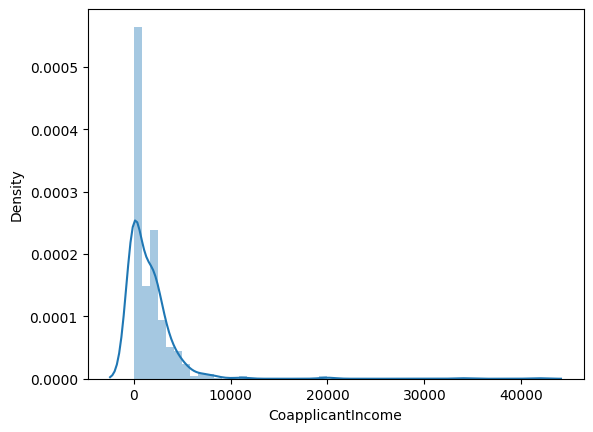

In [ ]:
sns.distplot(df["CoapplicantIncome"])

<ipython-input-35-c3db29b574fc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LoanAmount"])


<Axes: xlabel='LoanAmount', ylabel='Density'>

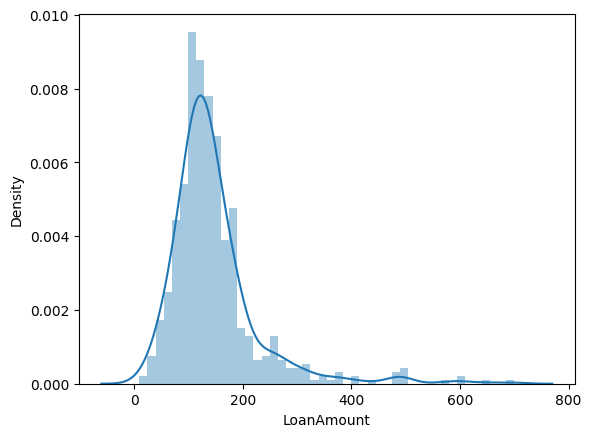

In [ ]:
sns.distplot(df["LoanAmount"])

#Log Transformation

<ipython-input-36-cdfeafb446fa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ApplicantIncomeLog"])


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

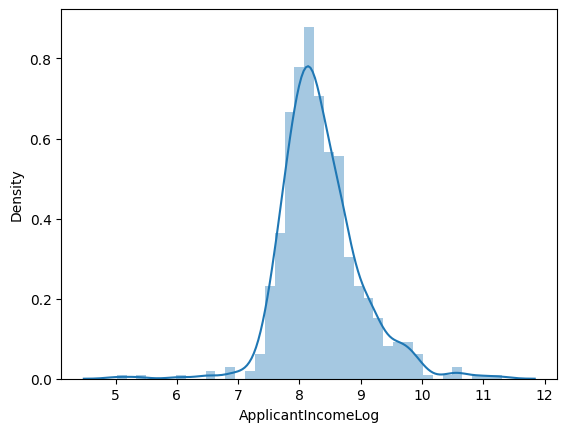

In [ ]:

# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"])

<ipython-input-37-64b2bb0f8cba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncomeLog"])


<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

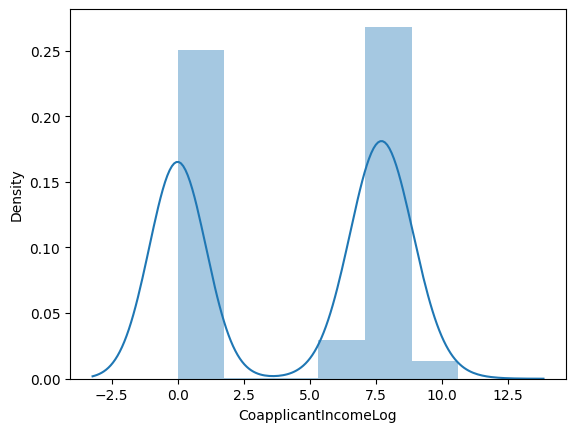

In [ ]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

#Coorelation Matrix

<ipython-input-38-69d44f56b651>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

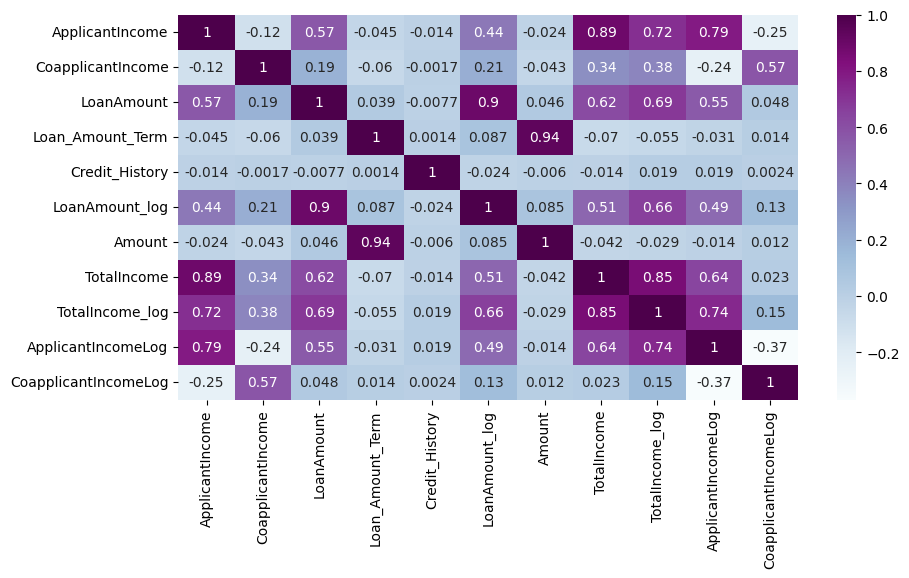

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [ ]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "TotalIncome", 'Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Amount,TotalIncome_log,ApplicantIncomeLog,CoapplicantIncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.857444,5.886104,8.674026,8.674197,0.000000
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,5.886104,8.714568,8.430327,7.319202
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,5.886104,8.006368,8.006701,0.000000
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,5.886104,8.505323,7.857094,7.765993
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,5.886104,8.699515,8.699681,0.000000


#Label Encoding--->Label encoding is a simple and effective way to convert categorical variables into numerical form

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Amount,TotalIncome_log,ApplicantIncomeLog,CoapplicantIncomeLog
0,1,0,0,0,0,1.0,3,1,4.857444,5.886104,8.674026,8.674197,0.000000
1,1,1,1,0,0,1.0,0,0,4.852030,5.886104,8.714568,8.430327,7.319202
2,1,1,0,0,1,1.0,3,1,4.189655,5.886104,8.006368,8.006701,0.000000
3,1,1,0,1,0,1.0,3,1,4.787492,5.886104,8.505323,7.857094,7.765993
4,1,0,0,0,0,1.0,3,1,4.948760,5.886104,8.699515,8.699681,0.000000


#Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in range(0,5):
  X_train[:,i]=le.fit_transform(X_train[:,i])
  X_train[:,7]=le.fit_transform(X_train[:,7])

X_train

array([[1, 1, 1, ..., 1.0, 3.784189633918261, 8],
       [1, 0, 0, ..., 1.0, 4.836281906951478, 8],
       [1, 0, 2, ..., 1.0, 5.087596335232384, 8],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 8],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 8],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 8]], dtype=object)

In [ ]:
for i in range(0,5):
  X_test[:,i]=le.fit_transform(X_test[:,i])
  X_test[:,7]=le.fit_transform(X_test[:,7])

X_test

array([[1, 0, 0, ..., 1.0, 4.430816798843313, 6],
       [0, 0, 0, ..., 1.0, 4.718498871295094, 6],
       [1, 1, 0, ..., 1.0, 5.780743515792329, 6],
       ...,
       [1, 1, 0, ..., 1.0, 4.912654885736052, 6],
       [1, 0, 0, ..., 1.0, 4.882801922586371, 6],
       [1, 1, 1, ..., 0.0, 4.795790545596741, 6]], dtype=object)

In [ ]:
le.fit_transform(Y_test)

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
le.fit_transform(Y_train)

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

# The use of StandardScaler in sklearn:
Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one  (unit variance)

In [ ]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
s.fit_transform(X_train)

array([[ 0.46575875,  0.69217027,  0.20631248, ...,  0.45680479,
        -2.16818296,  0.34133212],
       [ 0.46575875, -1.44473123, -0.77207659, ...,  0.45680479,
        -0.04830678,  0.34133212],
       [ 0.46575875, -1.44473123,  1.18470154, ...,  0.45680479,
         0.45807035,  0.34133212],
       ...,
       [ 0.46575875,  0.69217027,  2.1630906 , ...,  0.45680479,
         0.88265525,  0.34133212],
       [ 0.46575875,  0.69217027, -0.77207659, ...,  0.45680479,
         0.43304003,  0.34133212],
       [-2.14703426,  0.69217027, -0.77207659, ...,  0.45680479,
         0.69262728,  0.34133212]])

In [ ]:
s.fit_transform(X_test)

array([[ 0.49186938, -1.18585412, -0.6387615 , ...,  0.43609659,
        -0.84768827,  0.32769277],
       [-2.03306009, -1.18585412, -0.6387615 , ...,  0.43609659,
        -0.26459638,  0.32769277],
       [ 0.49186938,  0.84327404, -0.6387615 , ...,  0.43609659,
         1.88842707,  0.32769277],
       ...,
       [ 0.49186938,  0.84327404, -0.6387615 , ...,  0.43609659,
         0.1289311 ,  0.32769277],
       [ 0.49186938, -1.18585412, -0.6387615 , ...,  0.43609659,
         0.06842326,  0.32769277],
       [ 0.49186938,  0.84327404,  0.40772011, ..., -2.49742306,
        -0.10793681,  0.32769277]])

#Model Training

In [ ]:
from sklearn.naive_bayes import GaussianNB
G=GaussianNB()
G.fit(X_train,Y_train)

GaussianNB()

In [ ]:
ypred1=G.predict(X_test)
ypred1

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N'], dtype='<U1')

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,ypred1)
print("Accuracy:",acc*100)

Accuracy: 83.11688311688312


In [ ]:
from sklearn.ensemble  import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics
ypred2=model.predict(X_test)

print("accuracy of random classifer:",metrics.accuracy_score(ypred2,Y_test)*100)

accuracy of random classifer: 80.51948051948052


In [ ]:
from sklearn.svm import SVC
ss=SVC()
ss.fit(X_train,Y_train)

SVC()

In [ ]:
ypred3=ss.predict(X_test)


In [ ]:
from sklearn import metrics
acc=metrics.accuracy_score(Y_test,ypred3)
print("Accuracy:",acc*100)

Accuracy: 81.16883116883116


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
ypred4=lr.predict(X_test)
from sklearn import metrics
acc=metrics.accuracy_score(Y_test,ypred4)
print("Accuracy:",acc*100)

Accuracy: 83.11688311688312


#Confusion Matrix
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[ 22,  21],
       [  9, 102]])

<Axes: >

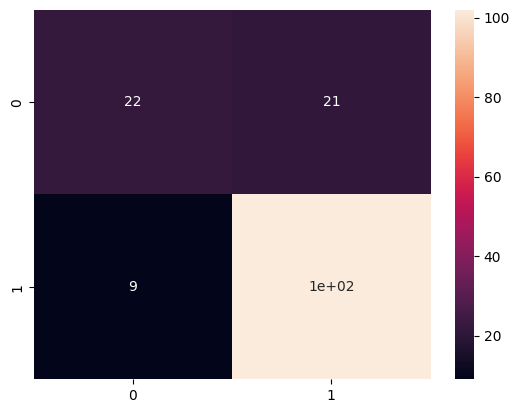

In [ ]:
sns.heatmap(cm, annot=True)

#Task 2
#On the same dataset draw conclusions from the dataset and create a tableau dashboard for the same.


https://public.tableau.com/app/profile/mounikadeepthi.nakka/viz/LoanDashboard_16953099053960/Dashboard1?publish=yes